# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [3]:
ID = 2065492
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 47 57 42 54 37 64 42 48 55]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


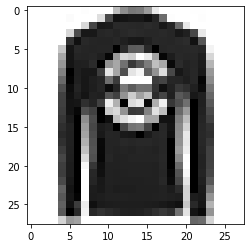

LABEL: 2
INPUT:


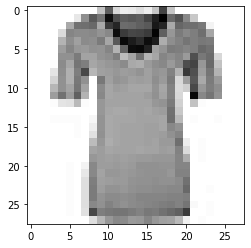

LABEL: 0
INPUT:


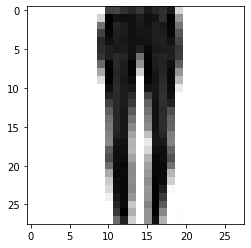

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}
mlp_estimator = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID)

mlp_cv = GridSearchCV(estimator=mlp_estimator, param_grid=hl_parameters, cv= 5)
    
mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.36542917
Iteration 2, loss = 2.03496057
Iteration 3, loss = 1.85165648
Iteration 4, loss = 1.51381532
Iteration 5, loss = 1.34463732
Iteration 6, loss = 1.20177448
Iteration 7, loss = 1.04951764
Iteration 8, loss = 1.24052093
Iteration 9, loss = 0.92814764
Iteration 10, loss = 0.91296055
Iteration 11, loss = 0.77512364
Iteration 12, loss = 0.88638588
Iteration 13, loss = 1.01042514
Iteration 14, loss = 0.86009524
Iteration 15, loss = 0.79395219
Iteration 16, loss = 0.67098225
Iteration 17, loss = 0.59545728
Iteration 18, loss = 0.56234741
Iteration 19, loss = 0.53568102
Iteration 20, loss = 0.57330887
Iteration 21, loss = 0.50549003
Iteration 22, loss = 0.59709950
Iteration 23, loss = 0.55879963
Iteration 24, loss = 0.44435161
Iteration 25, loss = 0.39996495
Iteration 26, loss = 0.37988497
Iteration 27, loss = 0.38970020
Iteration 28, loss = 0.48947492
Iteration 29, loss = 0.38378434
Iteration 30, loss = 0.41034792
Iteration 31, loss = 0.40921579
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2065492, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_cv.best_params_)

print("Score with best parameters:")
print(mlp_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.768

All scores on the grid:
[0.726 0.768 0.53  0.754]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

The results show that the model with one big hidden layer did better than the model with multiple small layers. This means that the big layer model was better able to fit the data. This is probably because the data has a lot of features (784) and therefore a more complex model is needed to understand it. Also, it seems that adding more layers does not help in this case, at least with the current settings.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [10]:
#get training and test error for the best NN model from CV

mlp = mlp_cv.best_estimator_

training_error = 1. - mlp.score(X_train, y_train)
test_error = 1. - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.227412


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [11]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 988,  952,  979, 1014,  981, 1012,  990, 1045,  994, 1045]))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [12]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = GridSearchCV(mlp_estimator, hl_parameters, cv=5)

mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 1.36633062
Iteration 2, loss = 0.76324249
Iteration 3, loss = 0.68168987
Iteration 4, loss = 0.60183090
Iteration 5, loss = 0.59241766
Iteration 6, loss = 0.57230618
Iteration 7, loss = 0.53230555
Iteration 8, loss = 0.54177884
Iteration 9, loss = 0.50457406
Iteration 10, loss = 0.48508410
Iteration 11, loss = 0.47010331
Iteration 12, loss = 0.44071274
Iteration 13, loss = 0.43977569
Iteration 14, loss = 0.42975158
Iteration 15, loss = 0.43291270
Iteration 16, loss = 0.41380177
Iteration 17, loss = 0.40828910
Iteration 18, loss = 0.39081227
Iteration 19, loss = 0.38117381
Iteration 20, loss = 0.38785329
Iteration 21, loss = 0.37274551
Iteration 22, loss = 0.38450705
Iteration 23, loss = 0.37751209
Iteration 24, loss = 0.36796742
Iteration 25, loss = 0.36995995
Iteration 26, loss = 0.35832529
Iteration 27, loss = 0.35911900
Iteration 28, loss = 0.36985810
Iteration 29, loss = 0.35220367
Iteration 30, loss = 0.34417490
Iteration 31, loss = 0.34254723
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2065492, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [13]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_cv.best_params_)

print("Score with best parameters:")
print(mlp_large_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_large_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}
Score with best parameters:
0.8474999999999999

All scores on the grid:
[0.7956 0.8448 0.8068 0.8475]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

The results indicate that increasing the size of the training data has led to better performance for all models. However, the models with larger layer sizes continue to perform the best on the validation data, even with the increased training data. This suggests that the larger layer models are able to better capture the underlying patterns in the data, even with more data available. Additionally, the fact that the two best models have very similar performance could indicate that one hidden layer is sufficient to fit the data. This suggests that adding additional layers does not significantly improve the model's performance, at least not with the current set of parameters. Therefore, the best model overall is the (50,) model.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [14]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv.best_estimator_

training_error = 1. - best_mlp_large.score(X_train, y_train)
test_error = 1. - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.019400
Best NN test error: 0.153020


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

The results indicate that both models have the same architecture but differ in the amount of training data used. By increasing the number of training samples to 500, the training error increased while the test error decreased. One possible solution would be to further increase the amount of training data to provide the model with more examples to learn from and generalize better.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


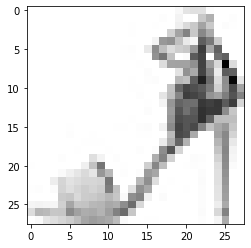

LABEL: 5
Small MLP: 9
Large MLP: 5


In [24]:
predictions_mlp = mlp.predict(X_test)
predictions_mlp_large = best_mlp_large.predict(X_test)

for index, label in enumerate(y_test):
    if predictions_mlp[index] != label and predictions_mlp_large[index] == label:
        plot_input(X_test, y_test, index)
        print(f'Small MLP: {predictions_mlp[index]}')
        print(f'Large MLP: {predictions_mlp_large[index]}')
        break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


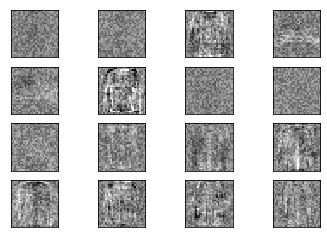

Weights with 10000 data points:


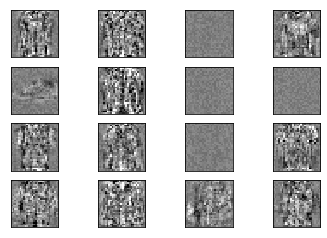

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

Each plot corresponds to a specific neuron and represents the weight of each pixel. White dots indicate that a specific pixel has a high weight value and thus it has a high influence on the output of the neuron. Whereas, darker dots indicate that a specific pixel has a low weight value and thus it has a lower influence on the output of the neuron. In the first model, the weights seem much more random, with a lot of variance between the different values. This is indicated by the larger number of very dark and very white pixels in the plots which makes it harder to identify such patterns. In the second model, the weights are more uniform, with most pixels having a gray shade. This means that the weight values have less variance, which makes it easier to distinguish patterns in the weight values. This makes it easier to identify the features of the images that the neuron is particularly sensitive to. Therefore, the second model has more interpretable weight values, as it is easier to identify the patterns in the weight values that correspond to different features of the images.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

In [17]:
# ADD YOUR CODE
from sklearn.svm import SVC

parameters = {'kernel': ['linear','poly','rbf'], 'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
svm = SVC(max_iter=300)
svm_grid = GridSearchCV(estimator = svm, param_grid = parameters, cv = 5)
svm_grid.fit(X_train, y_train)

print("Best parameters set found:")
print(svm_grid.best_params_)

print("Score with best parameters:")
print(svm_grid.best_score_)

print("\nAll scores on the grid:")
print(svm_grid.cv_results_['mean_test_score'])

other_model = svm_grid.best_estimator_

training_error_other = 1. - other_model.score(X_train, y_train)
test_error_other = 1. - other_model.score(X_test, y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

/home/daniel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/daniel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/daniel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/daniel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/daniel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver termina

Best parameters set found:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Score with best parameters:
0.8652

All scores on the grid:
[0.7695 0.7678 0.8546 0.7695 0.8025 0.8344 0.7695 0.8033 0.6733 0.7748
 0.7829 0.8652 0.7748 0.8026 0.8338 0.7748 0.8033 0.5441 0.7748 0.7996
 0.8514 0.7748 0.8026 0.8338 0.7748 0.8033 0.5441]
RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.034600
Best test error (other model): 0.138560


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

In this particular case, the SVM delivered a lower error rate than the best performing NN. More parameter configurations of the SVM were tested, specifically, we have experimented 27 different parameter configurations, while for the 1000 data points NN we have only tested 4 different architectures, without any changes of the hyper parameters. The performance of the NN can be improved, since there are more parameters to optimise.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [18]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [19]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [20]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID).fit(X_train)

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [21]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
labels = kmeans.predict(X_train)
matrix = sklearn.metrics.cluster.contingency_matrix(y_train, labels)
print(matrix)

[[  0  88  73   0   2  12  23   1   6   0]
 [173   1   2   0   0   3  21   0   0   0]
 [  0   4  52   0   1   7   1   1 121   0]
 [ 60  11  28   0   0  14  88   0   3   0]
 [  0  34  45   0   1   2  15   3  98   0]
 [  0   0   1  22   2 138   0   1   0  46]
 [  1  41  75   0   2  10  12   0  65   0]
 [  0   0   0  11   0  33   0   0   0 159]
 [  0   0  15   0  71  13   2  74   8   7]
 [  0   0   1 173   0   7   0   0   0  16]]


## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

The results of the clustering model show that the clusters generated do not match the labels perfectly, however, most of the groups include visually similar images. For instance, we can observe that most of the sandals (label = 5) and sneakers (label = 7) were grouped together in one cluster with label = 7 and also there is a cluster (label = 3) composed of ankle boots, sneakers and sandals which might be due to their similar shapes.
The only cluster that is not easily explainable is the one that includes a proportional number of all items, aside from trousers, sneakers and ankle boots. This might be due to the fact that the clustering algorithm only considers the visual similarity of the objects and might produce results that are not intuitive to humans, especially when the resolution of the images is low and grayscale. It's worth noting that even though the clusters do not perfectly match the labels, the model is still able to group similar items together. To improve the model, it could be beneficial to use higher resolution images and incorporating additional information such as texture and color.


## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [22]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    silhouttescore = sklearn.metrics.silhouette_score(X_train, KMeans(n_clusters=i, n_init=10, random_state=ID).fit_predict(X_train))
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19196154482654276
Silhoutte coefficient for number of clusters=3: 0.18283988966074313
Silhoutte coefficient for number of clusters=4: 0.17489660575057167
Silhoutte coefficient for number of clusters=5: 0.1585252138413065
Silhoutte coefficient for number of clusters=6: 0.1571538923162439
Silhoutte coefficient for number of clusters=7: 0.1660383633877077
Silhoutte coefficient for number of clusters=8: 0.16960338392028046
Silhoutte coefficient for number of clusters=9: 0.14242062326943472
Silhoutte coefficient for number of clusters=10: 0.14170852658206742
Silhoutte coefficient for number of clusters=11: 0.14009890502802022
Silhoutte coefficient for number of clusters=12: 0.12278686761776995
Silhoutte coefficient for number of clusters=13: 0.1281692490862319
Silhoutte coefficient for number of clusters=14: 0.12648647015640327
Silhoutte coefficient for number of clusters=15: 0.12311469308983504


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

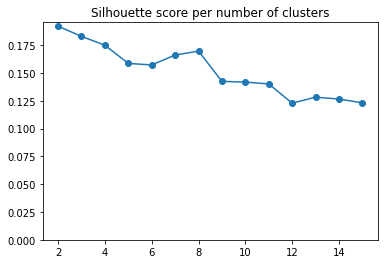

In [23]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

Based on the silhoutte score, I would choose a value of 8 for k, as it provides a good score (0.175) and enough clusters for a complex analysis of the data. As we can see, the more clusters, the silhoutte score decreases. The silhoutte score does not compute the 'correctness' of the clustering based on the data labels. It is simply a measure of dissimilarity between clusters, which is affected by the data distribution. Many clothing items have a similar shape, thus a confusion might appear. Also, the data being made up of black and white images with low resolution can make the items look more similar. As more clusters are created, the similarity between them increases, resulting in a decrease in the silhouette score. This is because the silhouette score is calculated based on the average distance between the data points within a cluster and the average distance between the data points in other clusters. As the number of clusters increases, the average distance between the data points in other clusters decreases, resulting in a lower silhouette score. Therefore, when choosing the number of clusters, it is important to balance the trade-off between the goal of the analysis, the characteristics of the data and the silhouette score.